DecisionTreeClassifier()
오차 행렬
[[33 10]
 [ 2 15]]
정확도: 0.8000, 정밀도: 0.6000, 재현율: 0.8824, F1: 0.7143, ROC/AUC: 0.8249
None
평균 정확도: 0.6455


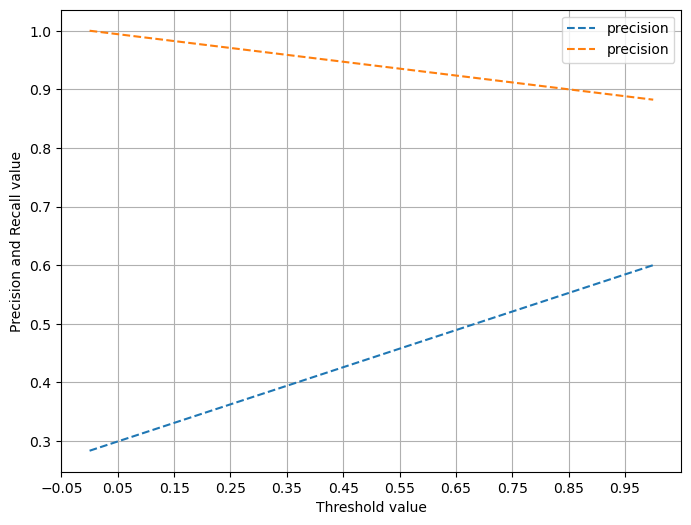

None
RandomForestClassifier()
오차 행렬
[[39  4]
 [ 3 14]]
정확도: 0.8833, 정밀도: 0.7778, 재현율: 0.8235, F1: 0.8000, ROC/AUC: 0.9378
None
평균 정확도: 0.7024


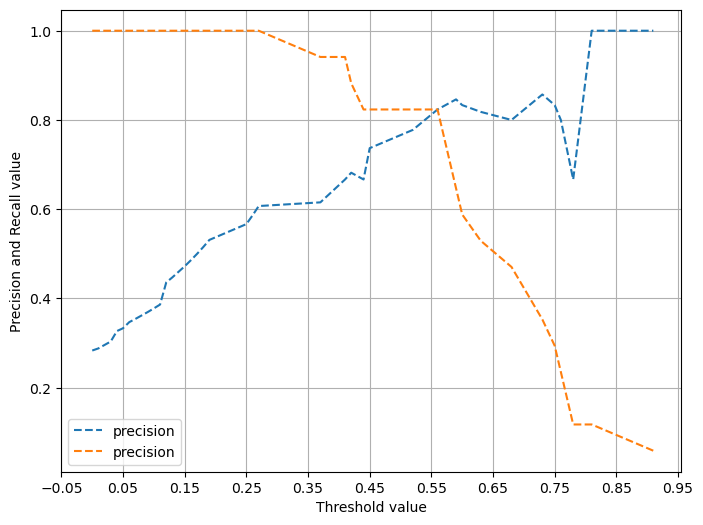

None
LogisticRegression(max_iter=10000)
오차 행렬
[[40  3]
 [ 5 12]]
정확도: 0.8667, 정밀도: 0.8000, 재현율: 0.7059, F1: 0.7500, ROC/AUC: 0.9070
None
평균 정확도: 0.7756


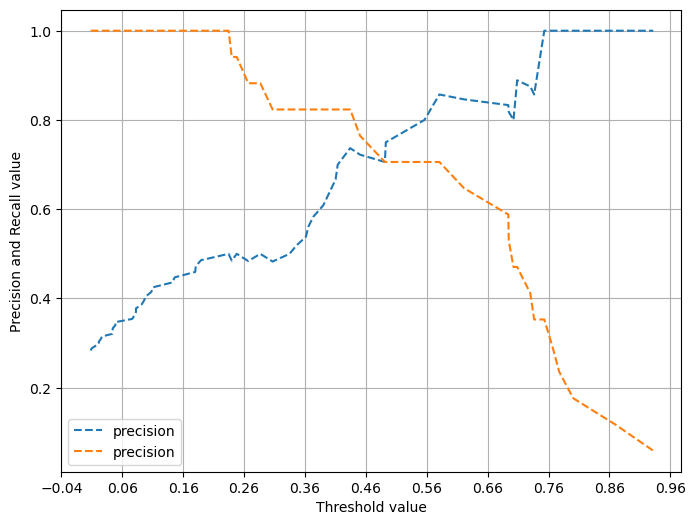

None


In [2]:
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.model_selection import train_test_split


df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

x_train, x_test, y_train, y_test = train_test_split(df.drop(['DEATH_EVENT'], axis=1), df['DEATH_EVENT'], test_size=0.2, random_state=11)

numeric_columns = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']

scaler = StandardScaler()
x_train[numeric_columns] = scaler.fit_transform(x_train[numeric_columns])
x_test[numeric_columns] = scaler.transform(x_test[numeric_columns])


# scaler = StandardScaler()
# x_train = scaler.fit_transform(x_train)
# x_test = scaler.transform(x_test)

#결정트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()
lr_clf = LogisticRegression(max_iter = 10000)

clfs = [dt_clf, rf_clf, lr_clf]

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, ROC/AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

def precision_recall_curve_plot(y_test = None, pred_proba=None):
    #threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba)

    #X축을 threshold 값으로, y축은 정밀도, 재현율 값으로 각각 plot 수행 - 정밀도는 점선
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], linestyle='--', label='precision')

    #threshold 값 X축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))

    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()

for clf in clfs:
    clf.fit(x_train, y_train)
    clf_pred = clf.predict(x_test)
    pred_proba = clf.predict_proba(x_test)[:, 1]
    scores = cross_val_score(clf, df.drop(['DEATH_EVENT'], axis=1), df['DEATH_EVENT'], cv=5, scoring='accuracy')
    print(clf)
    print(get_clf_eval(y_test, clf_pred, pred_proba))
    print(f"평균 정확도: {scores.mean():.4f}")
    print(precision_recall_curve_plot(y_test, pred_proba))